# 1. Google Play Store uygulamaları ve incelemeleri
* Mobil uygulamalar oluşturma kolaylığı ve yüksek kazançları nedeniyle popülerdir.
* Uygulamaları karşılaştırarak kapsamlı bir analiz yapılacak.
* Veri setleri;
    * <code>apps.csv</code>: Google Play'deki uygulamaların tamamını içerir. 13 tane değişken bulunur.
    * <code>user_reviews</code>: Her uygulama için en çok yardımcı olan 100 inceleme içerir. İncelemeler işlenmiş ve üç yeni özellikle ilişkilendirilmiştir: Sentiment (duygu - Positive, Negarive or Neutral), Sentiment Polarity and Sentiment Subjectivity.

In [5]:
# Veri setini oku
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Yinelenen değerleri at
apps = apps_with_duplicates.drop_duplicates()

# Toplam uygulama sayısını yazdır
print(f"Toplam uygulama sayısı: {apps.shape[0]}")

# İlk 5 satırı inceleme
apps.head()

Toplam uygulama sayısı: 9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Data cleaning (Veri temizleme)
* Veri temizleme, herhangi bir veri bilimi projesinin en temel alt görevlerinden biridir. Çok sıkıcı bir süreç olsa da, değeri asla küçümsenmemelidir.
* Veri setindeki Installs ve Price gibi sütunlar özel karakter içermeleri sebebiyle matematik hesaplamalarda kullanılmayı zorlaştırır. İdeal olarak bu sütunların sadece 0-9 arasındaki rakamları içermesi istenir.
* Bu verilerin temizlenmesi gerekir.

In [6]:
# Atılacak karakterlerin listesi
chars_to_remove = ["+", ",", "$"]
# Temizlenecek sütunların listesi
cols_to_clean = ["Installs", "Price"]

# Her bir sütunu temizlemek için döngü
for col in cols_to_clean:
    # Silinecek her bir karakter için döngü
    for char in chars_to_remove:
        # Karakterlerin boş stringler ile değiştirilmesi
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
# Veri seti hakkında bilgi
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


# 3. Veri türlerini düzeltme
* Özel karakterlerini çıkardığımız sütunları nümerik değişkene dönüştürmemiz gerekir.
* En çok çalışılacak sütunlar Installs, Size, Rating ve Price.

In [7]:
import numpy as np

# Installs'ın veri tipini float yapma
apps["Installs"] = apps["Installs"].astype("float")

# Price'ın veri tipini float yapma
apps["Price"] = apps["Price"].astype("float")

# Sütunların veri tipine bakma
apps.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 4. Uygulama kategorilerini keşfetme
* Pazarda en yüksek uygulama payı hangi kategoride?
* Piyasaya hakim belirli bir kategori var mı?
* Hangi kategorilerde en az sayıda uygulama var?

* 33 benzersiz uygulama kategorisi var. Family ile Game uygulamaları en yüksek pazar yaygınlığına sahip. Tools, Business ve Medical uygulamalar da üstlerde yer alıyor.

In [8]:
import plotly
plotly.offline.init_notebook_mode(connected = True)
import plotly.graph_objs as go

# Toplam benzersiz kategori sayısı
num_categories = len(apps["Category"].unique())
print(f"Kategori sayısı: {num_categories}")

# Her kategorideki ugulama sayısı
num_apps_in_category = apps["Category"].value_counts()

# Kategorileri azalan sıraya göre sırala
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Kategori sayısı: 33


# 5. Uygulama puanlarının dağılımı
* Uygulamaların ortalama puanlarını hesapla.
* Derecelendirmeler, bir uygulamanın temel performans göstergesidir.
* Uygulamaların ortalama puanı 4.17'dir. Histogram grafiği uygulamaların istisnalar dışında yüksek puan aldığını gösterir.

In [9]:
# Uygulamaların ortalama puanı
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Uygulamaların puanlarına göre dağılımı
data = [go.Histogram(
        x = apps['Rating']
)]

# Ortalama uygulama derecelendirmesini belirtmek için dikey kesikli çizgi
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


# 6. Bir uygulamanın boyutu ve fiyatı
* Mobil uygulamanın boyutu fazlaysa kullanıcıların indirmesi zor ve/veya pahlı olabilir. Uzun indirme süreleri uygulamanın indirilmemesine sebep olabilir. 
* Fiyat olarak bazı kullanıcılar uygulamaların ücretsiz veya ucuz olmasını bekler. Hedef dünya pazarı ise bu sorunlar daha da artar. İnternet hızları, alım gücü ve döviz kurları nedeniyle.
* Uygulamayı boyutlandırmak ve fiyatlandırmak için etkili bir şekilde nasıl stratejiler bulunabilir?
    * Bir uygulamanın boyutu, derecelendirmesini etkiler mi?
    * Kullanıcılar sistem ağırlıklı uygulamaları gerçekten önemsiyor mu yoksa hafif ağırlıklı uygulamaları mı tercih ediyorlar?
    * Bir uygulamanın fiyatı, derecelendirmesini etkiler mi?
    * Kullanıcılar her zaman ücretli uygulamalar yerine ücretsiz uygulamaları mı tercih eder?
* En çok oy alan uygulamaların (4'ün üzerinde puan alan) çoğunluğunun 2 MB ile 20 MB arasında değiştiği görülür. Ayrıca uygulamaların çoğu 10 doların altında fiyatlandırılmıştır.

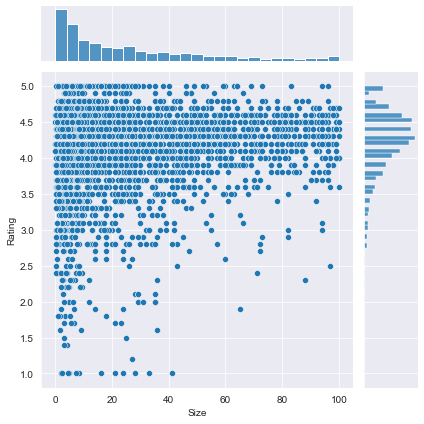

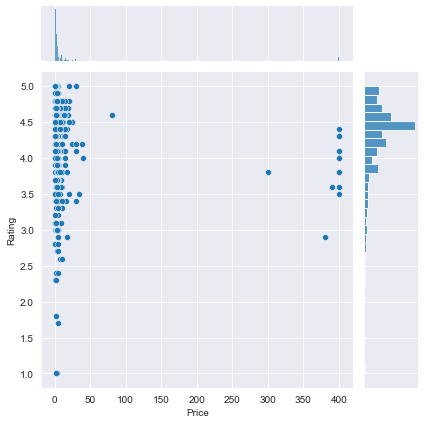

In [10]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Rating ve Size sütunlarından her ikisinin de boş olmadığı değerleri getir.
apps_with_size_and_rating_present = apps[(~apps["Rating"].isnull()) & (~apps["Size"].isnull())]

# 250den fazla uygulamaya sahip kategoriler için
large_categories = apps_with_size_and_rating_present.groupby(["Category"]).filter(lambda x: len(x) >= 250)

# Size vs Rating grafiği
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

# Türü ücretli olan uygulamalar seçiliyor.
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present["Type"] == "Paid"]

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps["Rating"])

# 7. Uygulama kategorisi ve uygulama fiyatı arasındaki ilişki
* Şirketler ve geliştiriciler nasıl geçinecek? Şirketler karı maksimize etmek için hangi para kazanma stratejilerini kullanabilir? Uygulamaların maliyetleri büyük ölçüde özelliklere, karmaşıklığa ve platforma bağlıdır.
* Uygulama için doğru fiyatlandırma yapmak için birçok fark faktör vardır. Müşterinin uygulama için ödeme yapma isteği göz önünde bulundurulmalıdır. Yanlış bir fiyat indirme gerçekleşmeden anlaşmayı bozabilir.
* Farklı kategoriler farklı fiyat aralıkları talep eder. Hesap makinesi gibi basit ve günlük olarak kullanılan bazı uygulamalar muhtemelen ücresiz tutulmalıdır. Bununla birlikte, diyabet hastalarını teşhis eden son derece uzmanlaşmış bir tıbbi uygulama için ücret almak mantıklı olur. En pahalı uygulamalar Medical ve Family uygulamalarıdır. Tıbbi uygulamalar 80 doları aşabilirken oyun uygulamaları için makul fiyat 20 dolar altıdır.

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


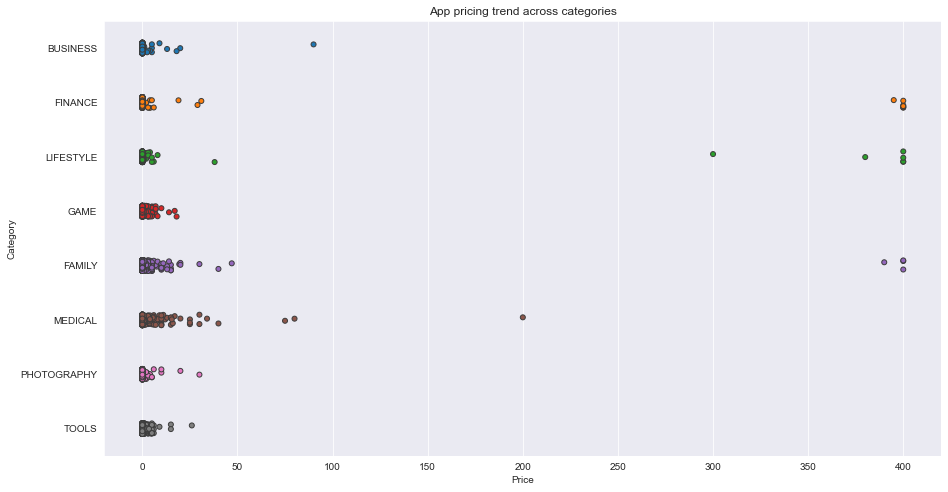

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Birkaç popüler uygulama kategorisi seç
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Price vs Category yaparak fiyat trendini incele
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats["Category"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps["Price"] > 200]
apps_above_200[['Category', 'App', 'Price']]

# 8. "Önemsiz" uygulamaları filtreleme
* Pahalı uygulamaların bir çoğu "önemsiz"dir. Bu tür uygulamaların bir amacı yoktur ve yalnızca şaka yapmak için geliştirilmiştir. Bazı geliştiriciler bunu kötü niyetle de yapabilir.

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

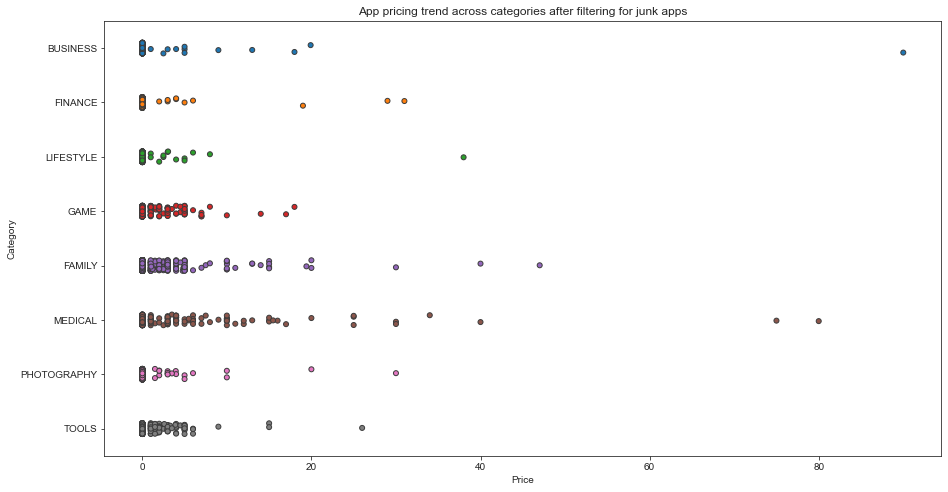

In [37]:
# 100 doların altında fiyatlandırılmış uygulamaları seç
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = "Price", y = "Category", data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# 9. Ücretli ve ücretsiz uygulamaların popülerliği
* Play Store'daki uygulamalar için beş tür fiyatlandırma stratejisi vardır; free, freemium, paid, paymium and subscription. Sadece free ve paid uygulamalara odaklanalım.
* Ücretsiz uygulamaların bazı özellikleri;
    * İndirmek için ücretsiz.
    * Ana gelir kaynağı genellikle reklamlardan gelir.
    * Genellikle başka ürünleri olan şirketler tarafından oluşturulur ve uygulama bu ürünlerin bir uzantısı olarak devam eder.
    * Müşteriyi elde tutma, iletişim ve müşteri hizmetleri için bir araç olarak hizmet edebilir.
* Ücretli uygulamaların bazı özellikleri;
    * Uygulamanın indirilmesi ve kullanılması için kullanıcılardan bir kez ödeme yapmaları istenir.
    * Kullanıcı satın almadan önce uygulama hakkında gerçekten bir fikir edinemez.
* Ücretli uygulamalar, ücretsiz uygulamalar kadar yüklenir mi? Fark beklediğimiz kadar kesin olmasa da ücretli uygulamalar ücretsizlere göre daha az yükleme sayısına sahiptir.

In [31]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

# 10. Kullanıcı İncelemelerinin Duygu Analizi
* İnsanların ürünün, markan veya hizmetin hakkında nasıl hissetiğini belirlemek için kullanıcı inceleme verilerinin madenciliği, duyarlılık analizi adı verilen bir teknik kullanılarak yapılabilir.
* Uygulamalar için yapılan kullaınıcı yorumları, o uygulamayla ilgili ruh halinin olumlu, olumsuz veya tarafsız olup olmadığını belirlemek için analiz edilebilir. 
* Olumlu kelimelere "harika", "arkadaş canlısı", "iyi" gibi kelimeler örnek verilebilir.
* Olumsuz kelimelere "kötü", "sorun", "yetersiz" gibi kelimeler örnek verilebilir.
* Grafiğe göre ücretsiz uygulamaların çok sayıda sert yorum aldığı görülür. Ücretli uygulamalar için yapılan incelemeler aşırı olmumsuz görünmüyor. Bu uygulamaların kalite farkını ortaya koyabilir. Ücretli uygulamalar daha kalitelidir.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

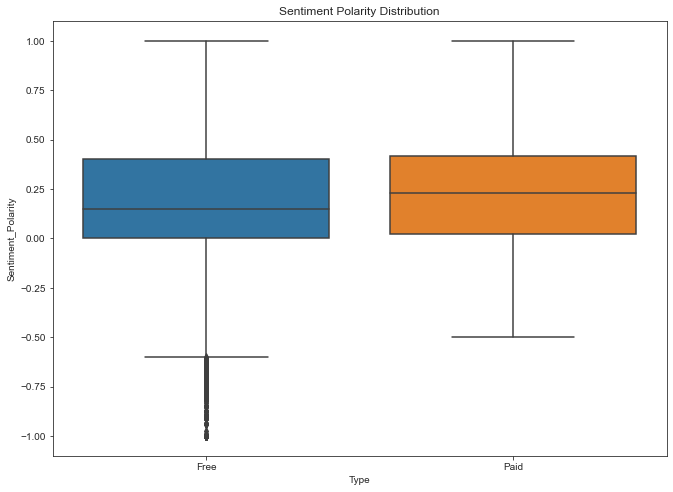

In [34]:
# user_reviews.csv okuma
reviews_df = pd.read_csv("datasets/user_reviews.csv")

# Join the two dataframes
merged_df = apps.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = "Type", y = "Sentiment_Polarity", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')